# *THE TOP 100 US COMPANIES RANKED BY REVENUE*
#### Fonte: *Kaggle.com*

## IL *DATASET*

*Fortune 500* ha stilato la lista delle 100 società americane ad azionariato diffuso più grandi per fatturato, e da tale *Dataset* verrà condotta una prima analisi dati con lo scopo di cercare settori dominanti, e quindi maggiormente presenti all'interno della lista, nonché visualizzare la crescita percentuale del loro fatturato, mostrando come il *ranking* possa essere analizzato da una diversa prospettiva a seconda se si tratti di classificare per fatturato o per variazione percentuale dello stesso

Le colonne oggetto del *Dataset* sono le seguenti:
- *Rank*: In quale posizione si trovano all'interno della lista (da 1 a 100);
- *Name*: Il nome della società;
- *Industry*: Il settore all'interno della quale opera la società;
- *Revenue (USD millions)*: Il fatturato espresso in milioni (USD);
- *Revenue growth*: La crescita percentuale del fatturato;
- *Employees*: Il numero di lavoratori;
- *Headquarters*: In quale Stato si trova la sede principale.

## PARTE 1

### *DATA PREPROCESSING*

In [1]:
#Iniziamo importando le quattro librerie essenziali per lo svolgimento di tale analisi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows",None) #Per mostrare tutte le righe del nostro dataset

In [2]:
#Leggiamo il dataset

df = pd.read_csv("Companies.csv")
df

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


In [3]:
df.shape #Presenta 100 righe, una per ogni azienda

(100, 8)

In [4]:
df["Unnamed: 0"].nunique() #Accertiamoci che questa colonna possa essere rimossa

100

In [5]:
#Rimuoviamo la colonna non utile ai fini dell'analisi

df = df.drop(["Unnamed: 0"],axis=True)
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [6]:
#Applichiamo una formula per avere solo il nome del paese dove è situato l'HQ dell'azienda

df["Headquarters"] = df["Headquarters"].apply(lambda country:country.split(",")[-1])
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000",Arkansas
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000",Washington
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000",Texas
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000",California
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000",Minnesota


In [7]:
#Facciamo un check sulla possibilità di trovare valori nulli

df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [8]:
#Vediamo quanti valori unici presanta la colonna "Industry"

df["Industry"].unique()

#Alcuni valori sono da aggiustare per errori grammaticali

array(['Retail', 'Retail and Cloud Computing', 'Petroleum industry',
       'Electronics industry', 'Healthcare', 'Conglomerate', 'Technology',
       'Health', 'Pharmaceutical industry', 'Health Insurance',
       'Automotive industry', 'Automotive', 'Financial services',
       'Telecommunications', 'Financials', 'Food industry',
       'Transportation', 'Beverage', 'Media', 'Automotive and Energy',
       'Consumer products Manufacturing', 'Logistics', 'Food Service',
       'Aerospace and defense', 'Aerospace and Defense', 'Infotech',
       'Machinery', 'Petroleum industry and Logistics', 'Insurance',
       'Chemical industry', 'Financial', 'Food Processing',
       'Agriculture manufacturing', 'Telecom Hardware Manufacturing',
       'Airline', 'Agriculture cooperative', 'Apparel',
       'Laboratory instruments'], dtype=object)

In [9]:
df["Industry"].nunique()

#La colonna "Industry" presenta 38 valori unici, i quali dovranno diminuire a seguito ad aggiustamenti e raggruppamenti

38

In [10]:
#Facciamo i necessari aggiustamenti

df["Industry"] = df["Industry"].replace("Aerospace and Defense","Aerospace and defense")

df["Industry"] = df["Industry"].replace("Financial","Financials") 
df["Industry"] = df["Industry"].replace("Financial services","Financials") 

In [11]:
#Eseguiamo i raggruppamenti per una migliore analisi settoriale

df["Industry"] = df["Industry"].replace("Electronics industry","Technology") 
df["Industry"] = df["Industry"].replace("Retail and Cloud Computing","Technology")

df["Industry"] = df["Industry"].replace("Petroleum industry","Petroleum industry and Logistics") 
df["Industry"] = df["Industry"].replace("Logistics","Petroleum industry and Logistics")

df["Industry"] = df["Industry"].replace("Health Insurance","Insurance") 

df["Industry"] = df["Industry"].replace("Automotive industry","Automotive") 
df["Industry"] = df["Industry"].replace("Automotive and Energy","Automotive") 

df["Industry"] = df["Industry"].replace("Food Processing","Food industry") 
df["Industry"] = df["Industry"].replace("Food Service","Food industry") 
df["Industry"] = df["Industry"].replace("Food industry","Food and beverage") 
df["Industry"] = df["Industry"].replace("Beverage","Food and beverage") 

df["Industry"] = df["Industry"].replace("Health","Healthcare") 

In [12]:
df["Industry"].unique()

array(['Retail', 'Technology', 'Petroleum industry and Logistics',
       'Healthcare', 'Conglomerate', 'Pharmaceutical industry',
       'Insurance', 'Automotive', 'Financials', 'Telecommunications',
       'Food and beverage', 'Transportation', 'Media',
       'Consumer products Manufacturing', 'Aerospace and defense',
       'Infotech', 'Machinery', 'Chemical industry',
       'Agriculture manufacturing', 'Telecom Hardware Manufacturing',
       'Airline', 'Agriculture cooperative', 'Apparel',
       'Laboratory instruments'], dtype=object)

In [13]:
df["Industry"].nunique() #Da 38 a 24 

24

In [14]:
df.dtypes

#Devo sostituire object con int o float per poter continuare con l'analisi

Rank                       int64
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object

In [15]:
#Cancello il simbolo % per poterlo rendere float

df["Revenue growth"] = df["Revenue growth"].apply(lambda rev:rev.split("%")[0]) 

In [16]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7,"2,100,000",Arkansas
1,2,Amazon,Technology,"513,983",9.4,"1,540,000",Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,"413,680",44.8,"62,000",Texas
3,4,Apple,Technology,"394,328",7.8,"164,000",California
4,5,UnitedHealth Group,Healthcare,"324,162",12.7,"400,000",Minnesota


In [17]:
#Sostituisco "," con "." per poterlo rendere float

df["Revenue (USD millions)"] = df["Revenue (USD millions)"].apply(lambda rev:rev.replace(",","."))

In [18]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611.289,6.7,"2,100,000",Arkansas
1,2,Amazon,Technology,513.983,9.4,"1,540,000",Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,413.680,44.8,"62,000",Texas
3,4,Apple,Technology,394.328,7.8,"164,000",California
4,5,UnitedHealth Group,Healthcare,324.162,12.7,"400,000",Minnesota


In [19]:
#Sostituisco "," con "." per poterlo rendere float

df["Employees"] = df["Employees"].apply(lambda rev:rev.replace(",","")) 

In [20]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611.289,6.7,2100000,Arkansas
1,2,Amazon,Technology,513.983,9.4,1540000,Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,413.680,44.8,62000,Texas
3,4,Apple,Technology,394.328,7.8,164000,California
4,5,UnitedHealth Group,Healthcare,324.162,12.7,400000,Minnesota


In [21]:
df["Revenue growth"] = df["Revenue growth"].convert_dtypes() #Da object diventa string

In [22]:
df["Revenue growth"] = round(pd.to_numeric(df["Revenue growth"], errors='ignore'),1) #Da string a float

In [23]:
df.dtypes

Rank                        int64
Name                       object
Industry                   object
Revenue (USD millions)     object
Revenue growth            Float64
Employees                  object
Headquarters               object
dtype: object

In [24]:
df["Revenue (USD millions)"] = df["Revenue (USD millions)"].convert_dtypes() #Da object diventano string

In [25]:
df["Revenue (USD millions)"] = round(pd.to_numeric(df["Revenue (USD millions)"], errors='ignore'),1) #Da string a float

In [26]:
df.dtypes

Rank                        int64
Name                       object
Industry                   object
Revenue (USD millions)    Float64
Revenue growth            Float64
Employees                  object
Headquarters               object
dtype: object

In [27]:
df["Employees"] = df["Employees"].convert_dtypes() #Da object diventano string

In [28]:
df["Employees"] = pd.to_numeric(df["Employees"], errors='ignore',downcast="integer") #Da string a int 

In [29]:
df.dtypes

Rank                        int64
Name                       object
Industry                   object
Revenue (USD millions)    Float64
Revenue growth            Float64
Employees                   Int32
Headquarters               object
dtype: object

In [30]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611.3,6.7,2100000,Arkansas
1,2,Amazon,Technology,514.0,9.4,1540000,Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,413.7,44.8,62000,Texas
3,4,Apple,Technology,394.3,7.8,164000,California
4,5,UnitedHealth Group,Healthcare,324.2,12.7,400000,Minnesota


#### *EXPLORATORY DATA ANALYSIS AND VISUALIZATION*

In [31]:
#Adesso voglio creare quattro fasce per valore di fatturato: Top, High, Medium, Low

df.describe().transpose()

#Per crearle, mi baso sul minimo/massimo e i quartili

,count,mean,std,min,25%,50%,75%,max
Rank,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
Revenue (USD millions),100.0,117.566,100.919895,44.2,57.9,80.85,138.725,611.3
Revenue growth,100.0,19.576,21.463397,0.5,4.375,11.7,23.625,97.2
Employees,100.0,168030.07,271749.30091,305.0,44711.5,89638.5,196512.5,2100000.0


In [32]:
#Definisco una funzione per le quattro categorie

def int(i):
    if i>=44.2 and i<=57.9:
        return "Low"
    elif i>57.9 and i<=80.85:
        return "Medium"
    elif i>80.85 and i<=138.725:
        return "High"
    else:
        return "Top"

In [33]:
#Applico la funzione

df["Revenue Ranking"] = df["Revenue (USD millions)"].apply(int)

In [34]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue Ranking
0,1,Walmart,Retail,611.3,6.7,2100000,Arkansas,Top
1,2,Amazon,Technology,514.0,9.4,1540000,Washington,Top
2,3,Exxon Mobil,Petroleum industry and Logistics,413.7,44.8,62000,Texas,Top
3,4,Apple,Technology,394.3,7.8,164000,California,Top
4,5,UnitedHealth Group,Healthcare,324.2,12.7,400000,Minnesota,Top


In [35]:
#Voglio spostare la colonna "Revenue Ranking" vicino a "Revenue (USD million)"

revenue_ranking = df.pop("Revenue Ranking")

In [36]:
#La inserisco in posizione 4

df.insert(4, "Revenue Ranking", revenue_ranking)

In [37]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue Ranking',
       'Revenue growth', 'Employees', 'Headquarters'],
      dtype='object')

In [38]:
#Rnomino la colonna "Revenue growth" per indicare che i valori sono in percentuale

df.columns = ['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue Ranking',
       'Revenue growth (%)', 'Employees', 'Headquarters']

In [39]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue Ranking,Revenue growth (%),Employees,Headquarters
0,1,Walmart,Retail,611.3,Top,6.7,2100000,Arkansas
1,2,Amazon,Technology,514.0,Top,9.4,1540000,Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,413.7,Top,44.8,62000,Texas
3,4,Apple,Technology,394.3,Top,7.8,164000,California
4,5,UnitedHealth Group,Healthcare,324.2,Top,12.7,400000,Minnesota


### LIVELLO DI PRESENZA DEI SETTORI ALL'INTERNO DEI 100

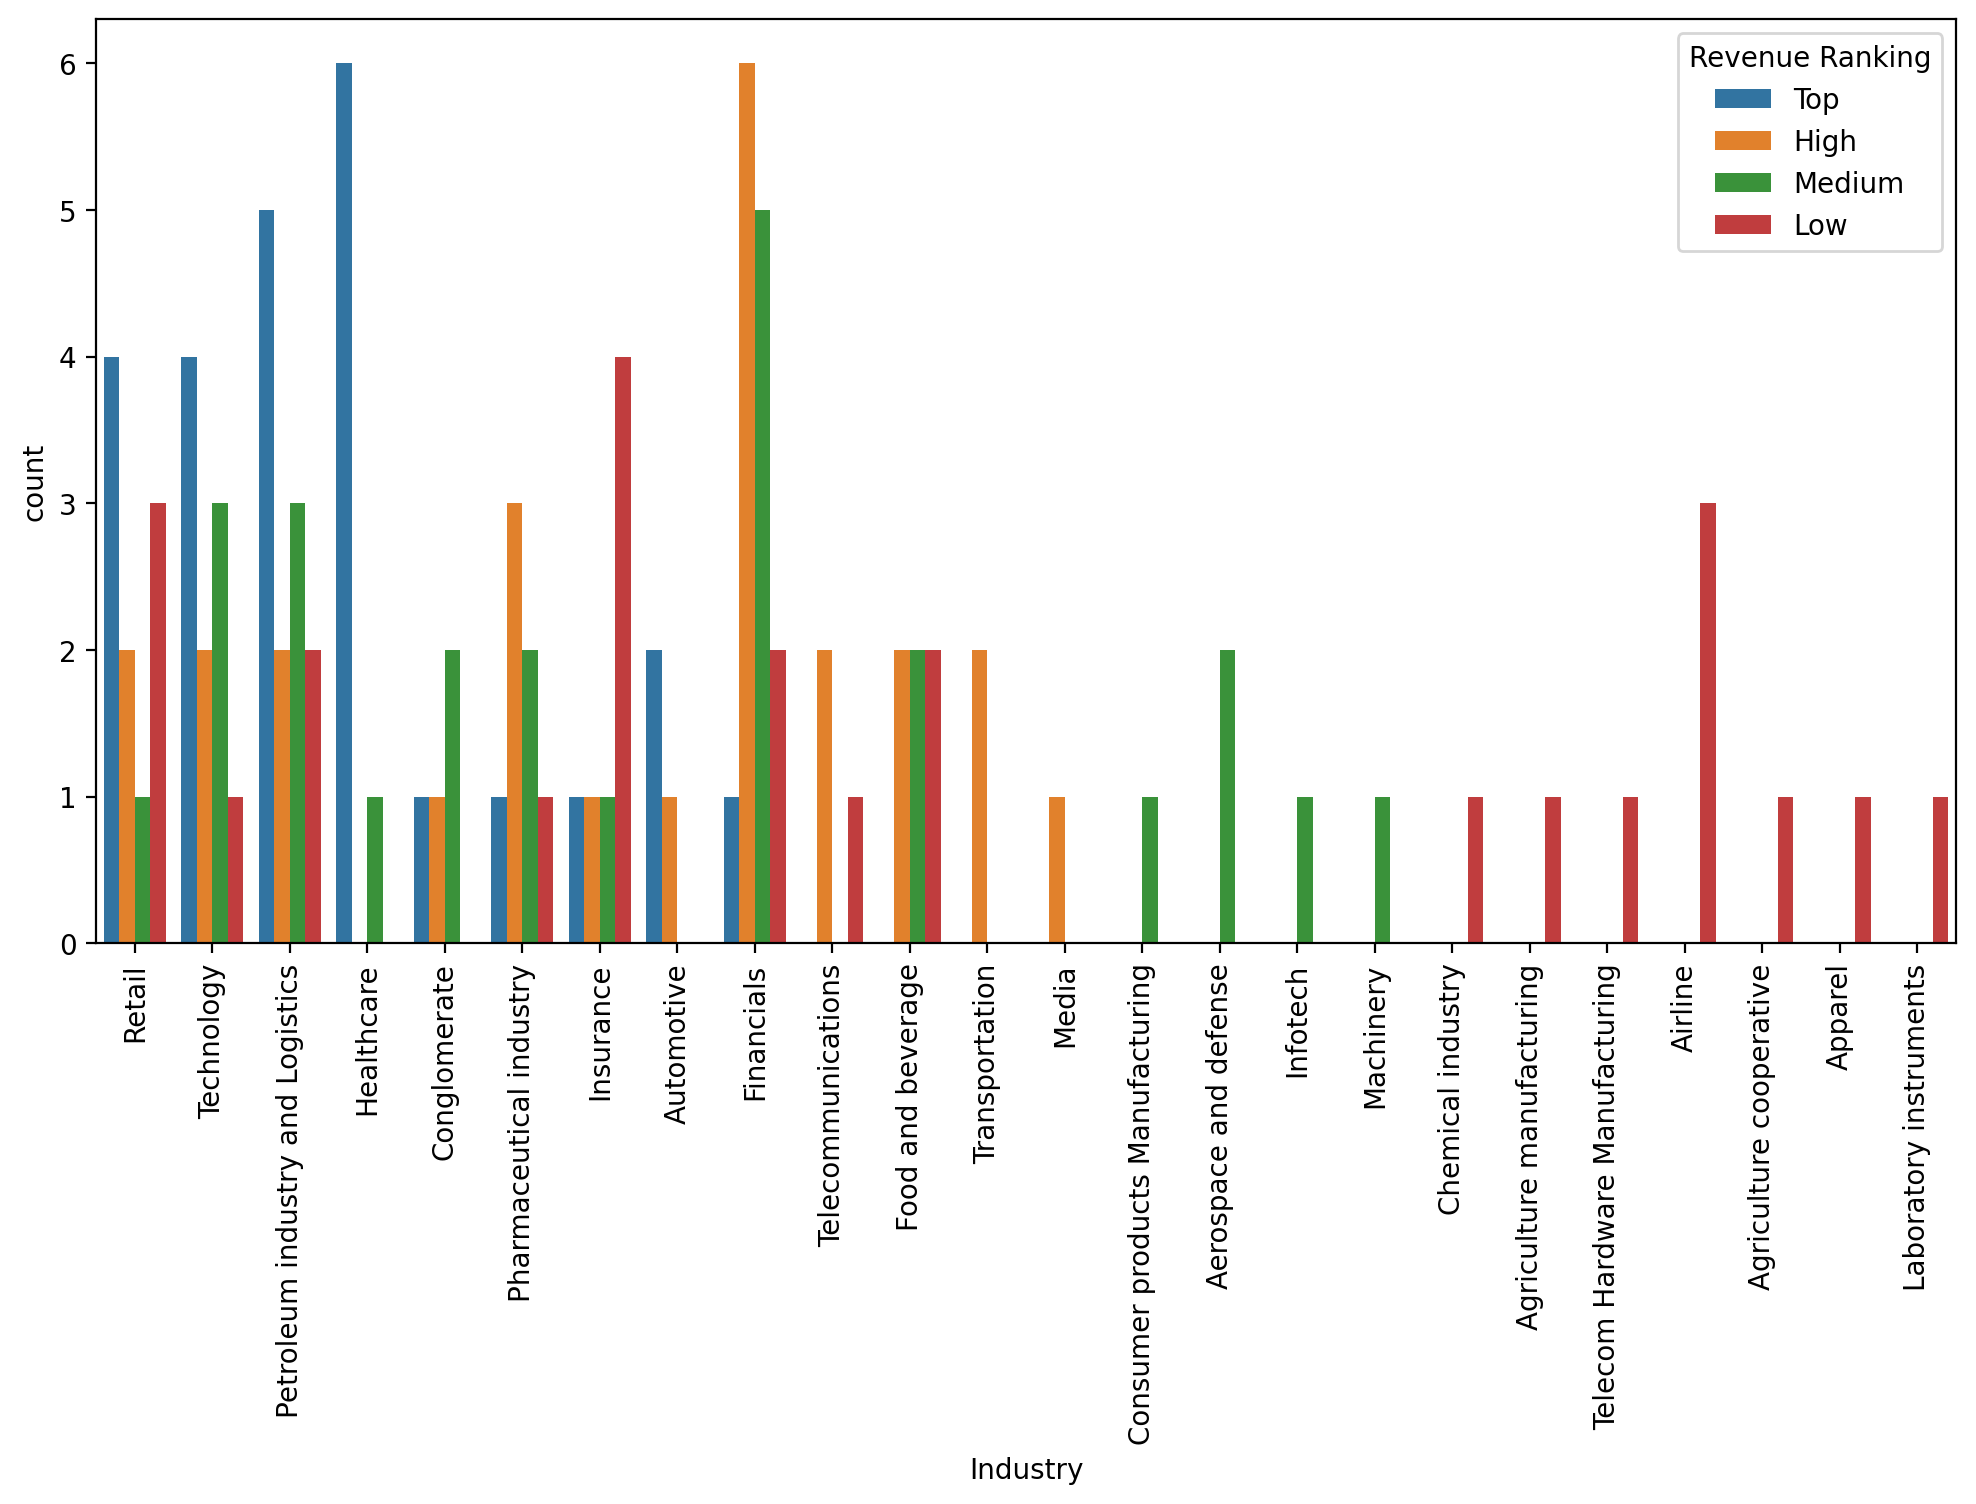

In [40]:
#Vediamo adesso se ci sono industry che si ripetono spesso all'interno dei 100 e a quale fascia appartengono

plt.figure(figsize=(12,6), dpi=200)
sns.countplot(df,x="Industry", hue="Revenue Ranking")
plt.xticks(rotation=90)
plt.show()


Graficamente possiamo vedere che:
- I settori *Retail, Technology, Petroleum and Logistics ed Healthcare* sono sia i più presenti sia quelli con il maggior numeri di società in fascia *Top*;
- Il settore *Automotive* risulta quinto per presenza di società fascia *Top*;
- Il settore *Financials* ha solo una società in fascia *Top* con un buon numero di società inserite all'interno dei 100 e in fasce *High* e *Medium*;
- Il settore *Insurance* presenta la massima frequenza di valori in fascia *Low*, meno frequenti quelli in fasce superiori;
- Il settore *Pharmaceutical* ha elevata presenza in fascia *High*, e bassa nelle restanti tre;
- Il settore *Airline* risulta all'ultimo posto per tutti valori in fascia *Low*

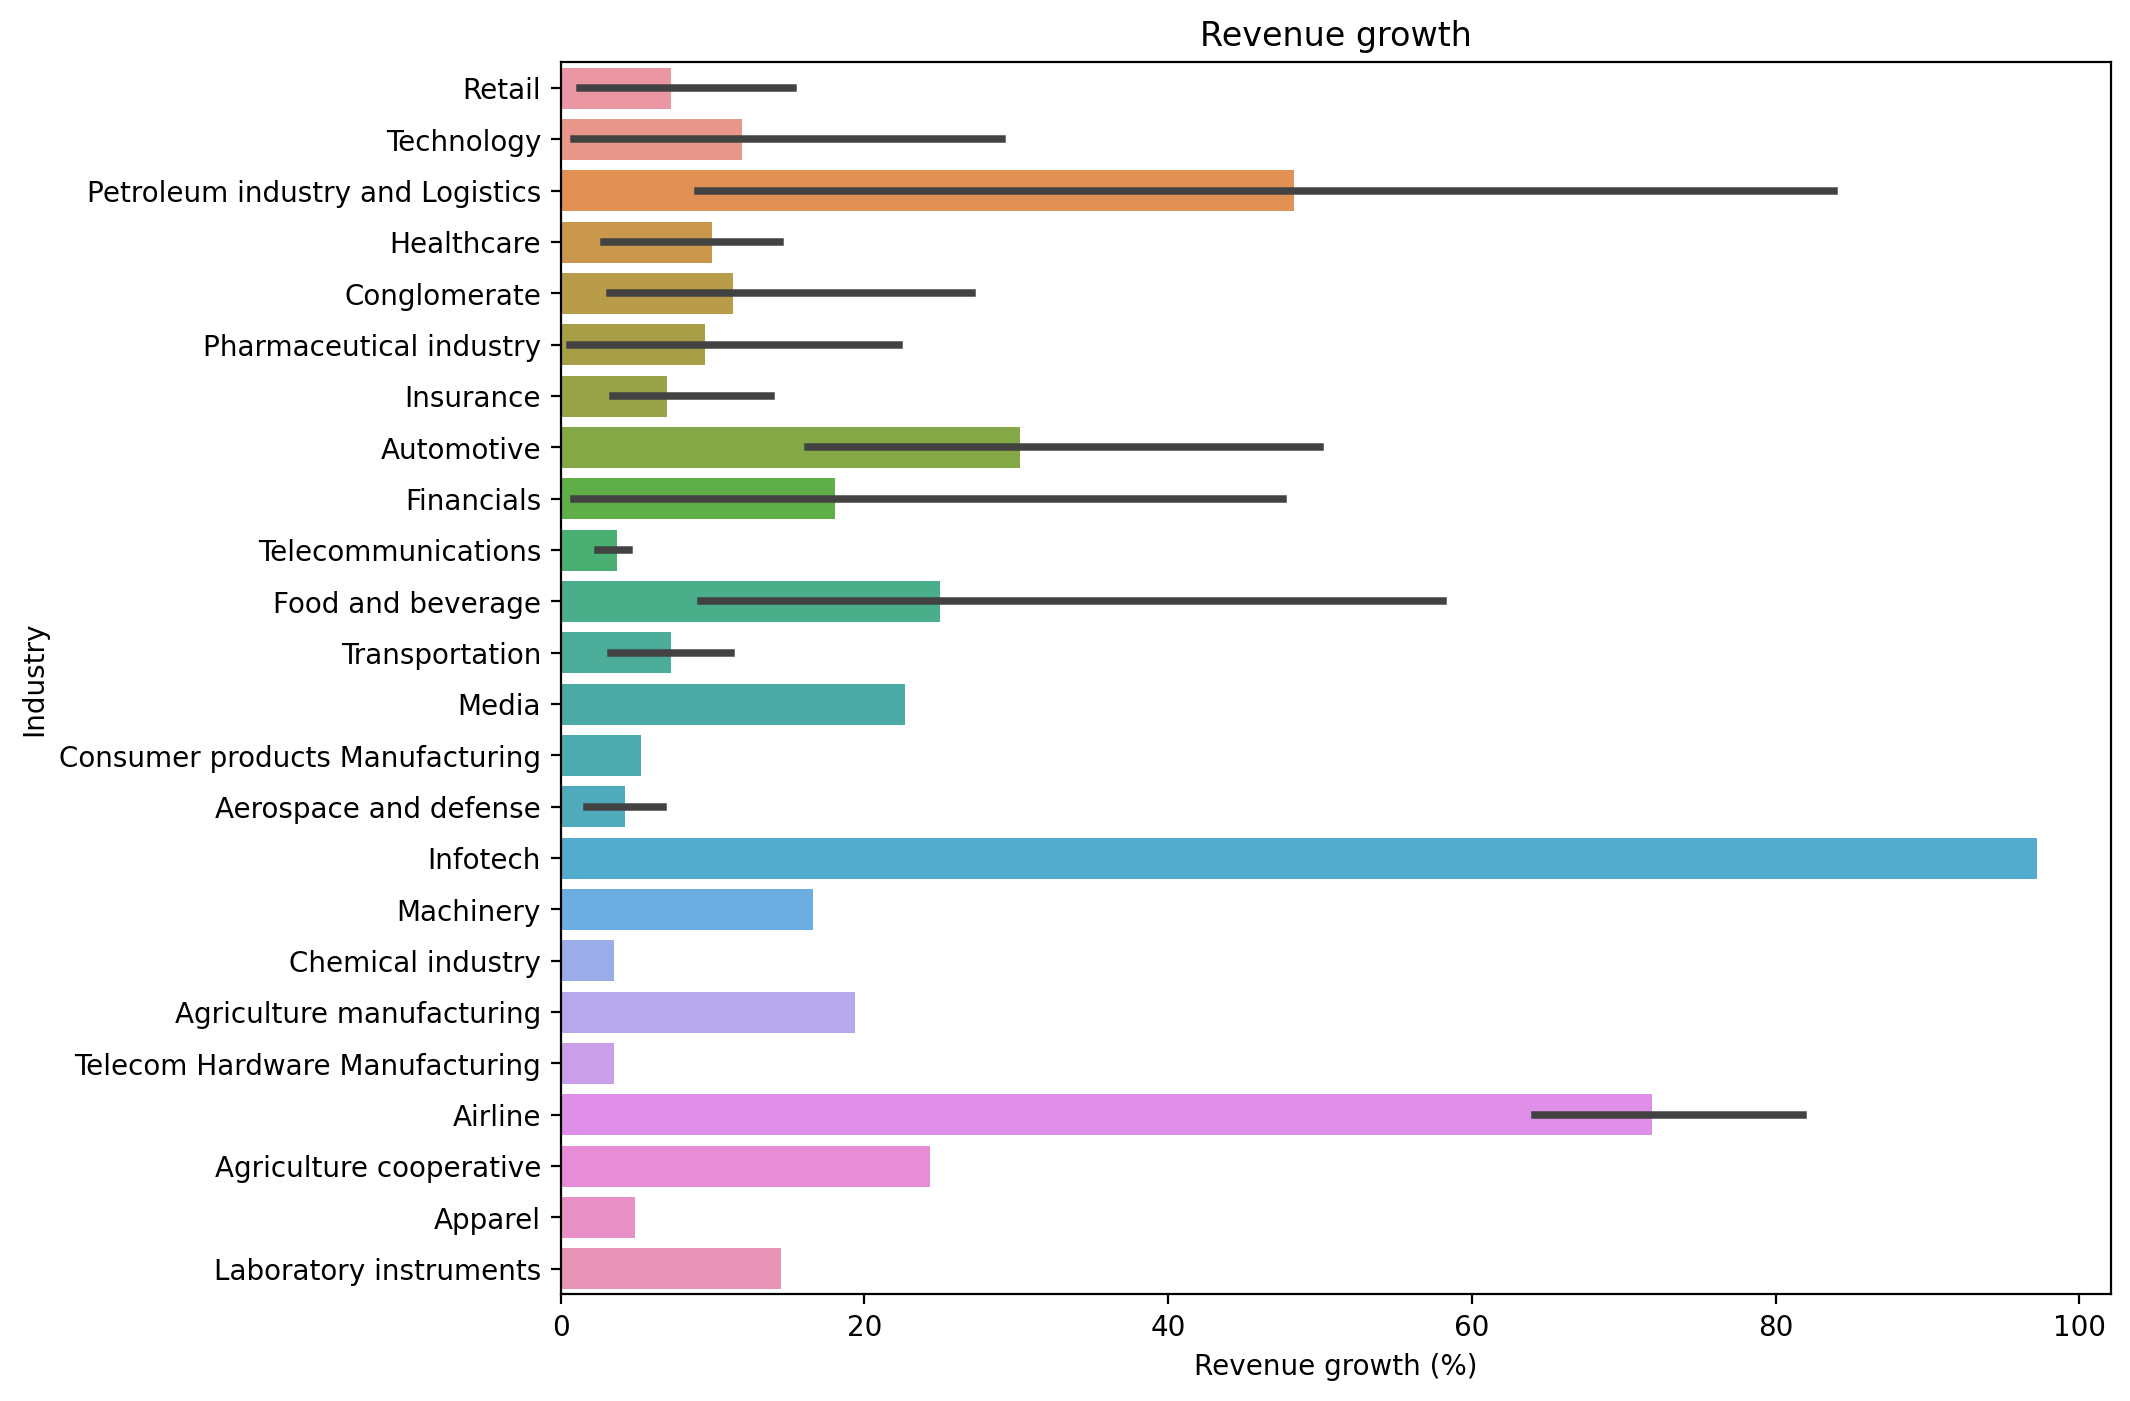

In [41]:
#Vediamo la lista da una prospettiva diversa: media del tasso di crescita del fatturato e massimo/minimo ciascuno

plt.figure(figsize=(10,8), dpi=200)
sns.barplot(data=df,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi")
plt.title("Revenue growth")
plt.show()

Graficamente vediamo come cambia la prospettiva delle 100 società se rapportate per tasso di crescita del fatturato.
In questo caso anche il *rank* assegnato potrebbe risultare molto diverso per alcuni settori, come *Airline* ed *Infotech*, mentre invariato per altri, come *Petroleum industry and Logistics* e *Financials*.

Ora analizziamo i 10 settori più presenti all'interno dei 100 con i relativi tassi di crescita del fatturato
 - *Retail*;
 - *Petroleum industry and Logistics*;
 - *Healthcare*;
 - *Technology*;
 - *Financials*
 - *Insurance*;
 - *Airline*,
 - *Pharmaceutical*;
 - *Automotive*;
 - *Food and beverage*


In [42]:
#Mi creo un subset con solo i valori dei 10 settori presi in considerazione

options = ["Retail","Petroleum industry and Logistics","Healthcare","Technology","Financials","Insurance","Airline", "Pharmaceutical industry", "Automotive", "Food and beverage"]
df_ten = df[df["Industry"].isin(options)]
df_ten

,Rank,Name,Industry,Revenue (USD millions),Revenue Ranking,Revenue growth (%),Employees,Headquarters
0,1,Walmart,Retail,611.3,Top,6.7,2100000,Arkansas
1,2,Amazon,Technology,514.0,Top,9.4,1540000,Washington
2,3,Exxon Mobil,Petroleum industry and Logistics,413.7,Top,44.8,62000,Texas
3,4,Apple,Technology,394.3,Top,7.8,164000,California
4,5,UnitedHealth Group,Healthcare,324.2,Top,12.7,400000,Minnesota
5,6,CVS Health,Healthcare,322.5,Top,10.4,259500,Rhode Island
7,8,Alphabet,Technology,282.8,Top,9.8,156000,California
8,9,McKesson Corporation,Healthcare,276.7,Top,4.8,48500,Texas
9,10,Chevron Corporation,Petroleum industry and Logistics,246.3,Top,51.6,43846,California
10,11,AmerisourceBergen,Pharmaceutical industry,238.6,Top,11.5,41500,Pennsylvania


In [43]:
len(df_ten) #I 10 settori includono ben 79 delle cento società 

79

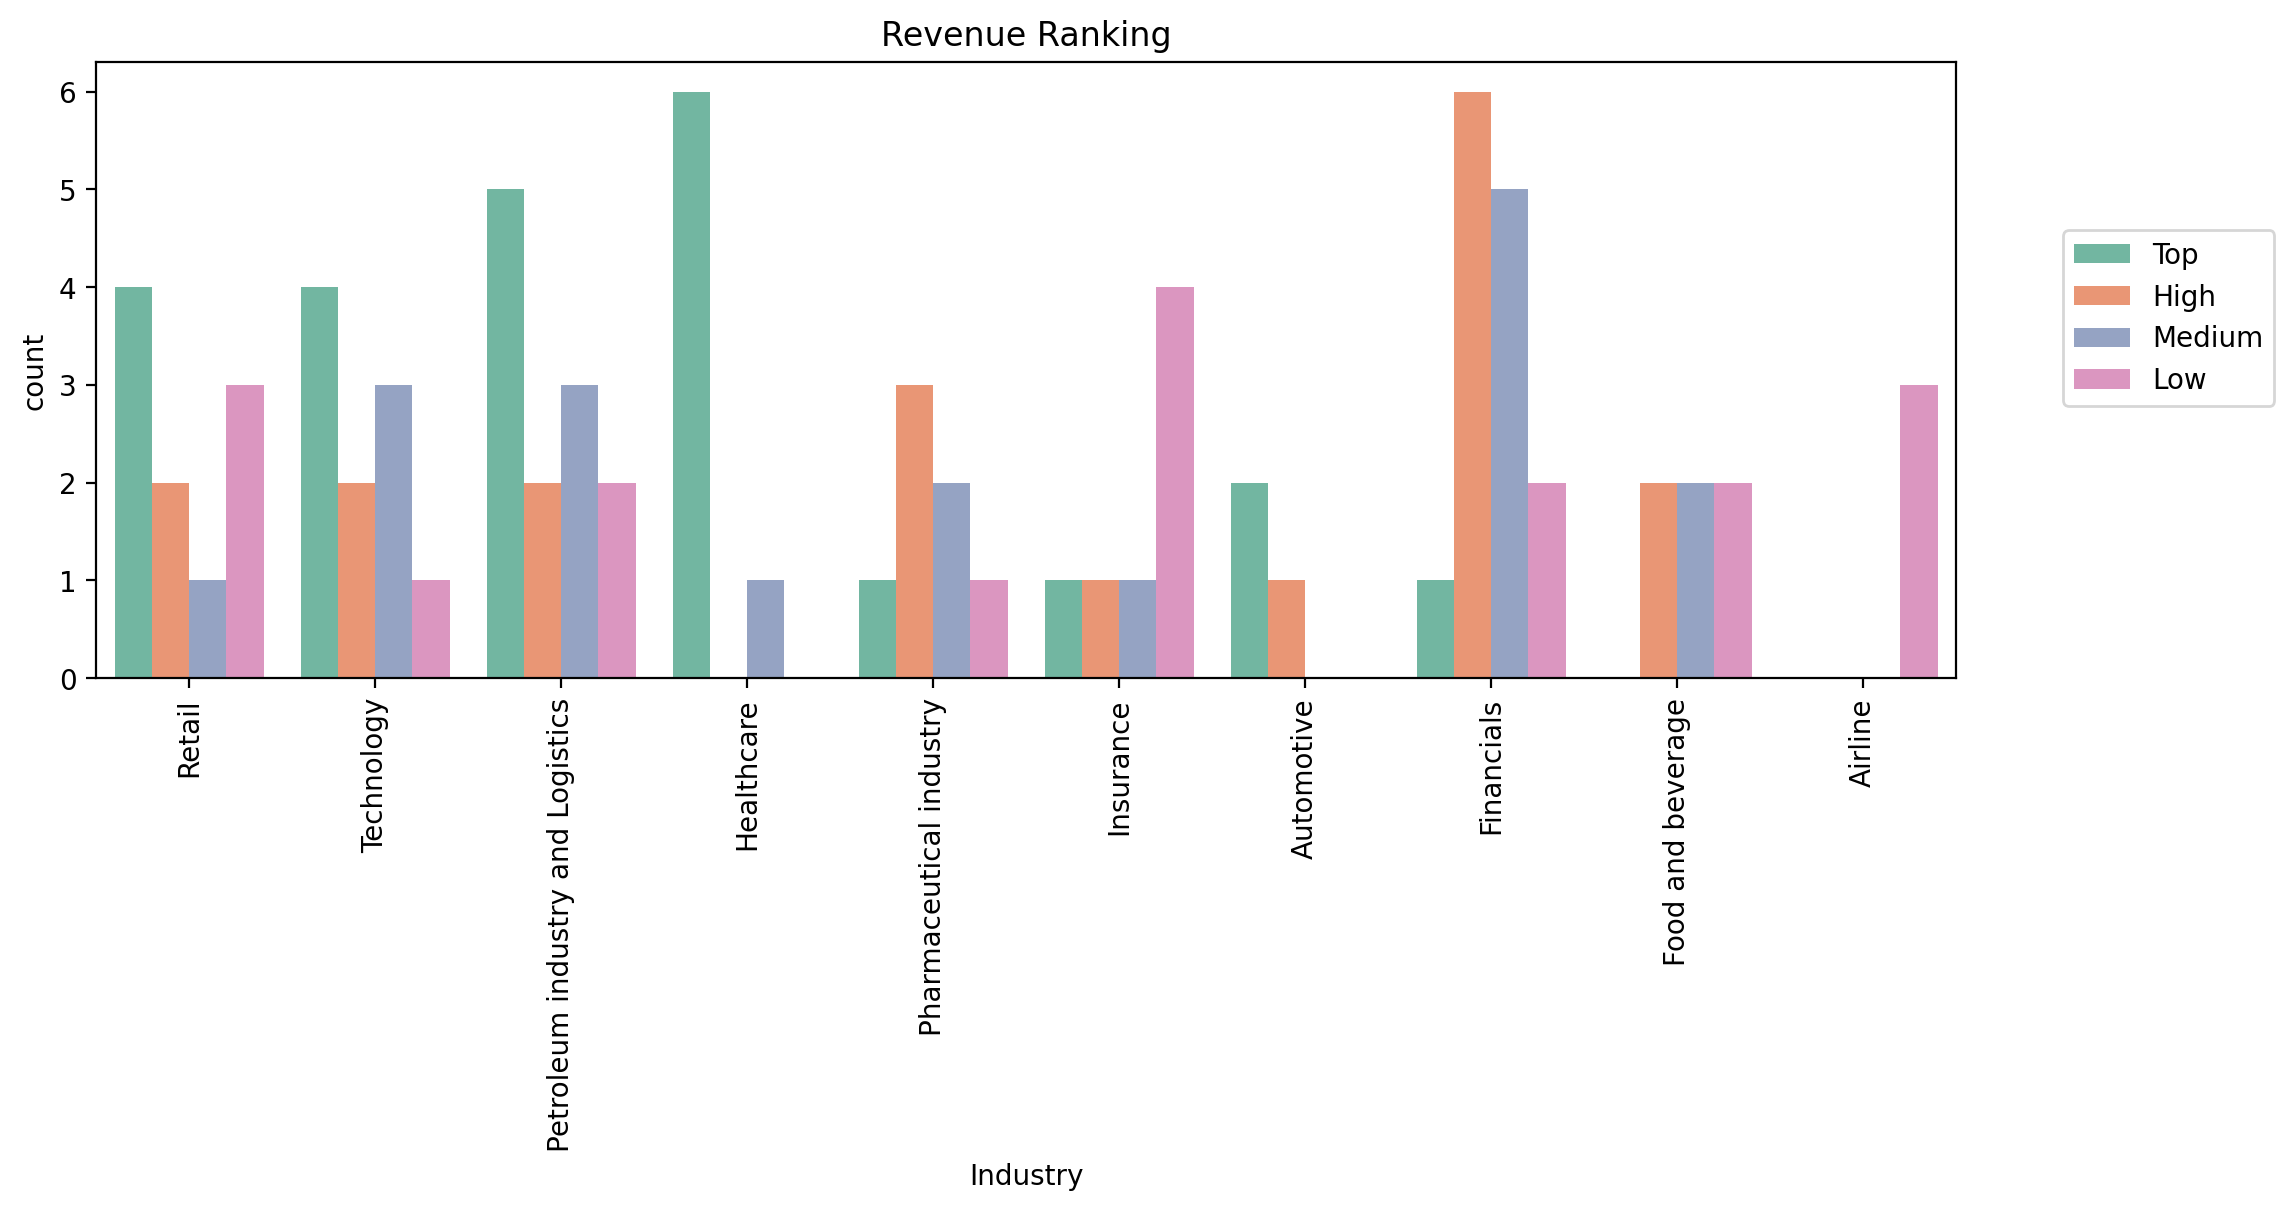

In [44]:
#Vediamo graficamente i 10 settori a confronto tra di loro, accompagnati dalle relative fasce di fatturato

plt.figure(figsize=(12,4), dpi=200)
sns.countplot(df_ten,x="Industry", hue="Revenue Ranking", palette="Set2")
plt.xticks(rotation=90)
plt.title("Revenue Ranking")
plt.legend(bbox_to_anchor=(1.05,0.75))
plt.show()

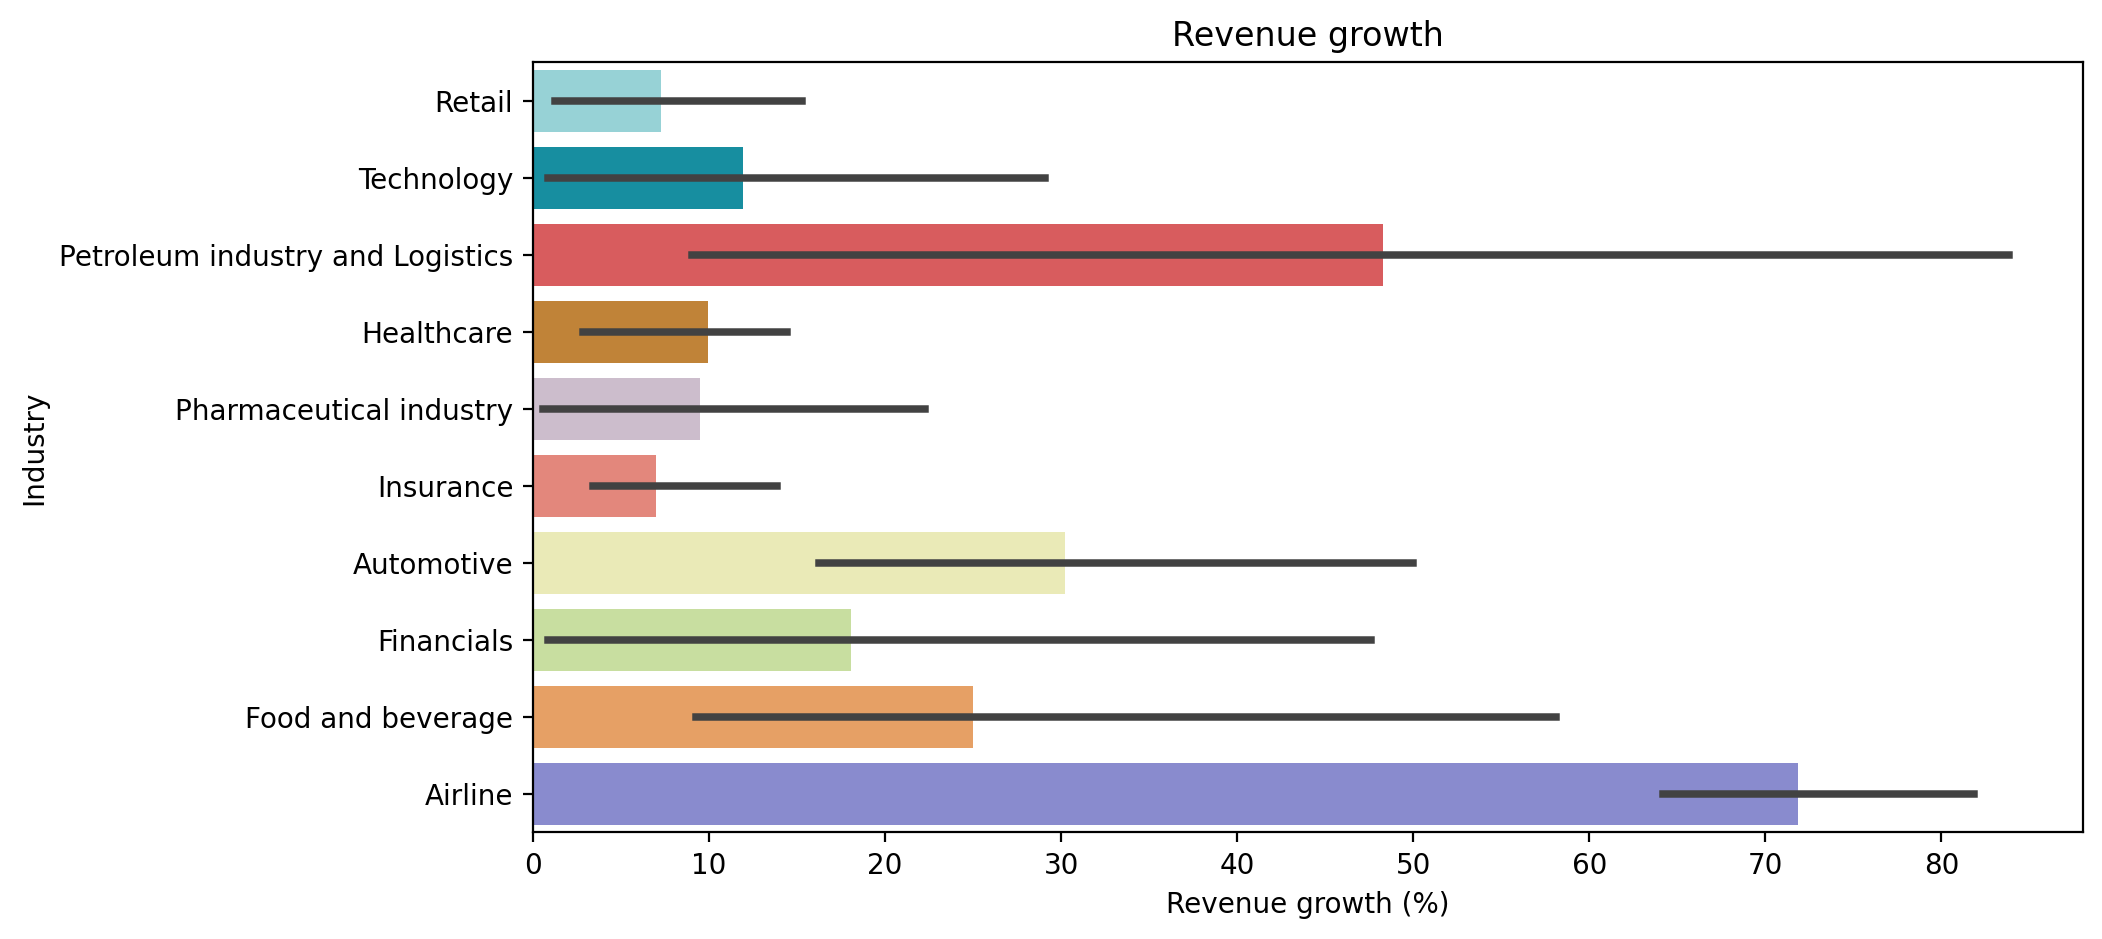

In [45]:
#Per tasso di crescita medio del fatturato, con minimi e massimi

plt.figure(figsize=(10,5), dpi=200)
colors = {"Retail":"#8DDBE0",
         "Technology":"#009FB7",
         "Petroleum industry and Logistics":"#ED474A",
         "Healthcare":"#D78521",
         "Pharmaceutical industry":"#CEBACF",
         "Insurance":"#F4796B",
         "Automotive":"#F2F3AE",
         "Financials":"#CBE896",
         "Food and beverage":"#FC9E4F",
         "Airline":"#7D80DA"
         }
sns.barplot(data=df_ten,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi", palette=colors)
plt.title("Revenue growth")
plt.show()

Visivamente possiamo vedere come, per tasso di crescita del fatturato, si ha una diversa prospettiva della lista delle 100 società. 
Il settore *Airline* risulta quello cresciuto maggiormente, con minimo e massimo relativamente vicini alla media.
In linea con il *rank* c'è il settore *Petroleum industry and Logistics*, seppure presenta un minimo ed un massimo molto lontani dalla media. 
I settori restanti hanno un tasso di crescita relativamente basso, ma se la cavano bene i settori dell'*Automotive* e del *Food and beverage*, tra l'altro quelli meno presenti nella lista

### UN INSIGHT DEI SETTORI PER CIASCUNA FASCIA

In [46]:
df_top = df_ten[df_ten["Revenue Ranking"]=="Top"]

In [47]:
df_high = df_ten[df_ten["Revenue Ranking"]=="High"]

In [48]:
df_medium = df_ten[df_ten["Revenue Ranking"]=="Medium"]

In [49]:
df_low = df_ten[df_ten["Revenue Ranking"]=="Low"]

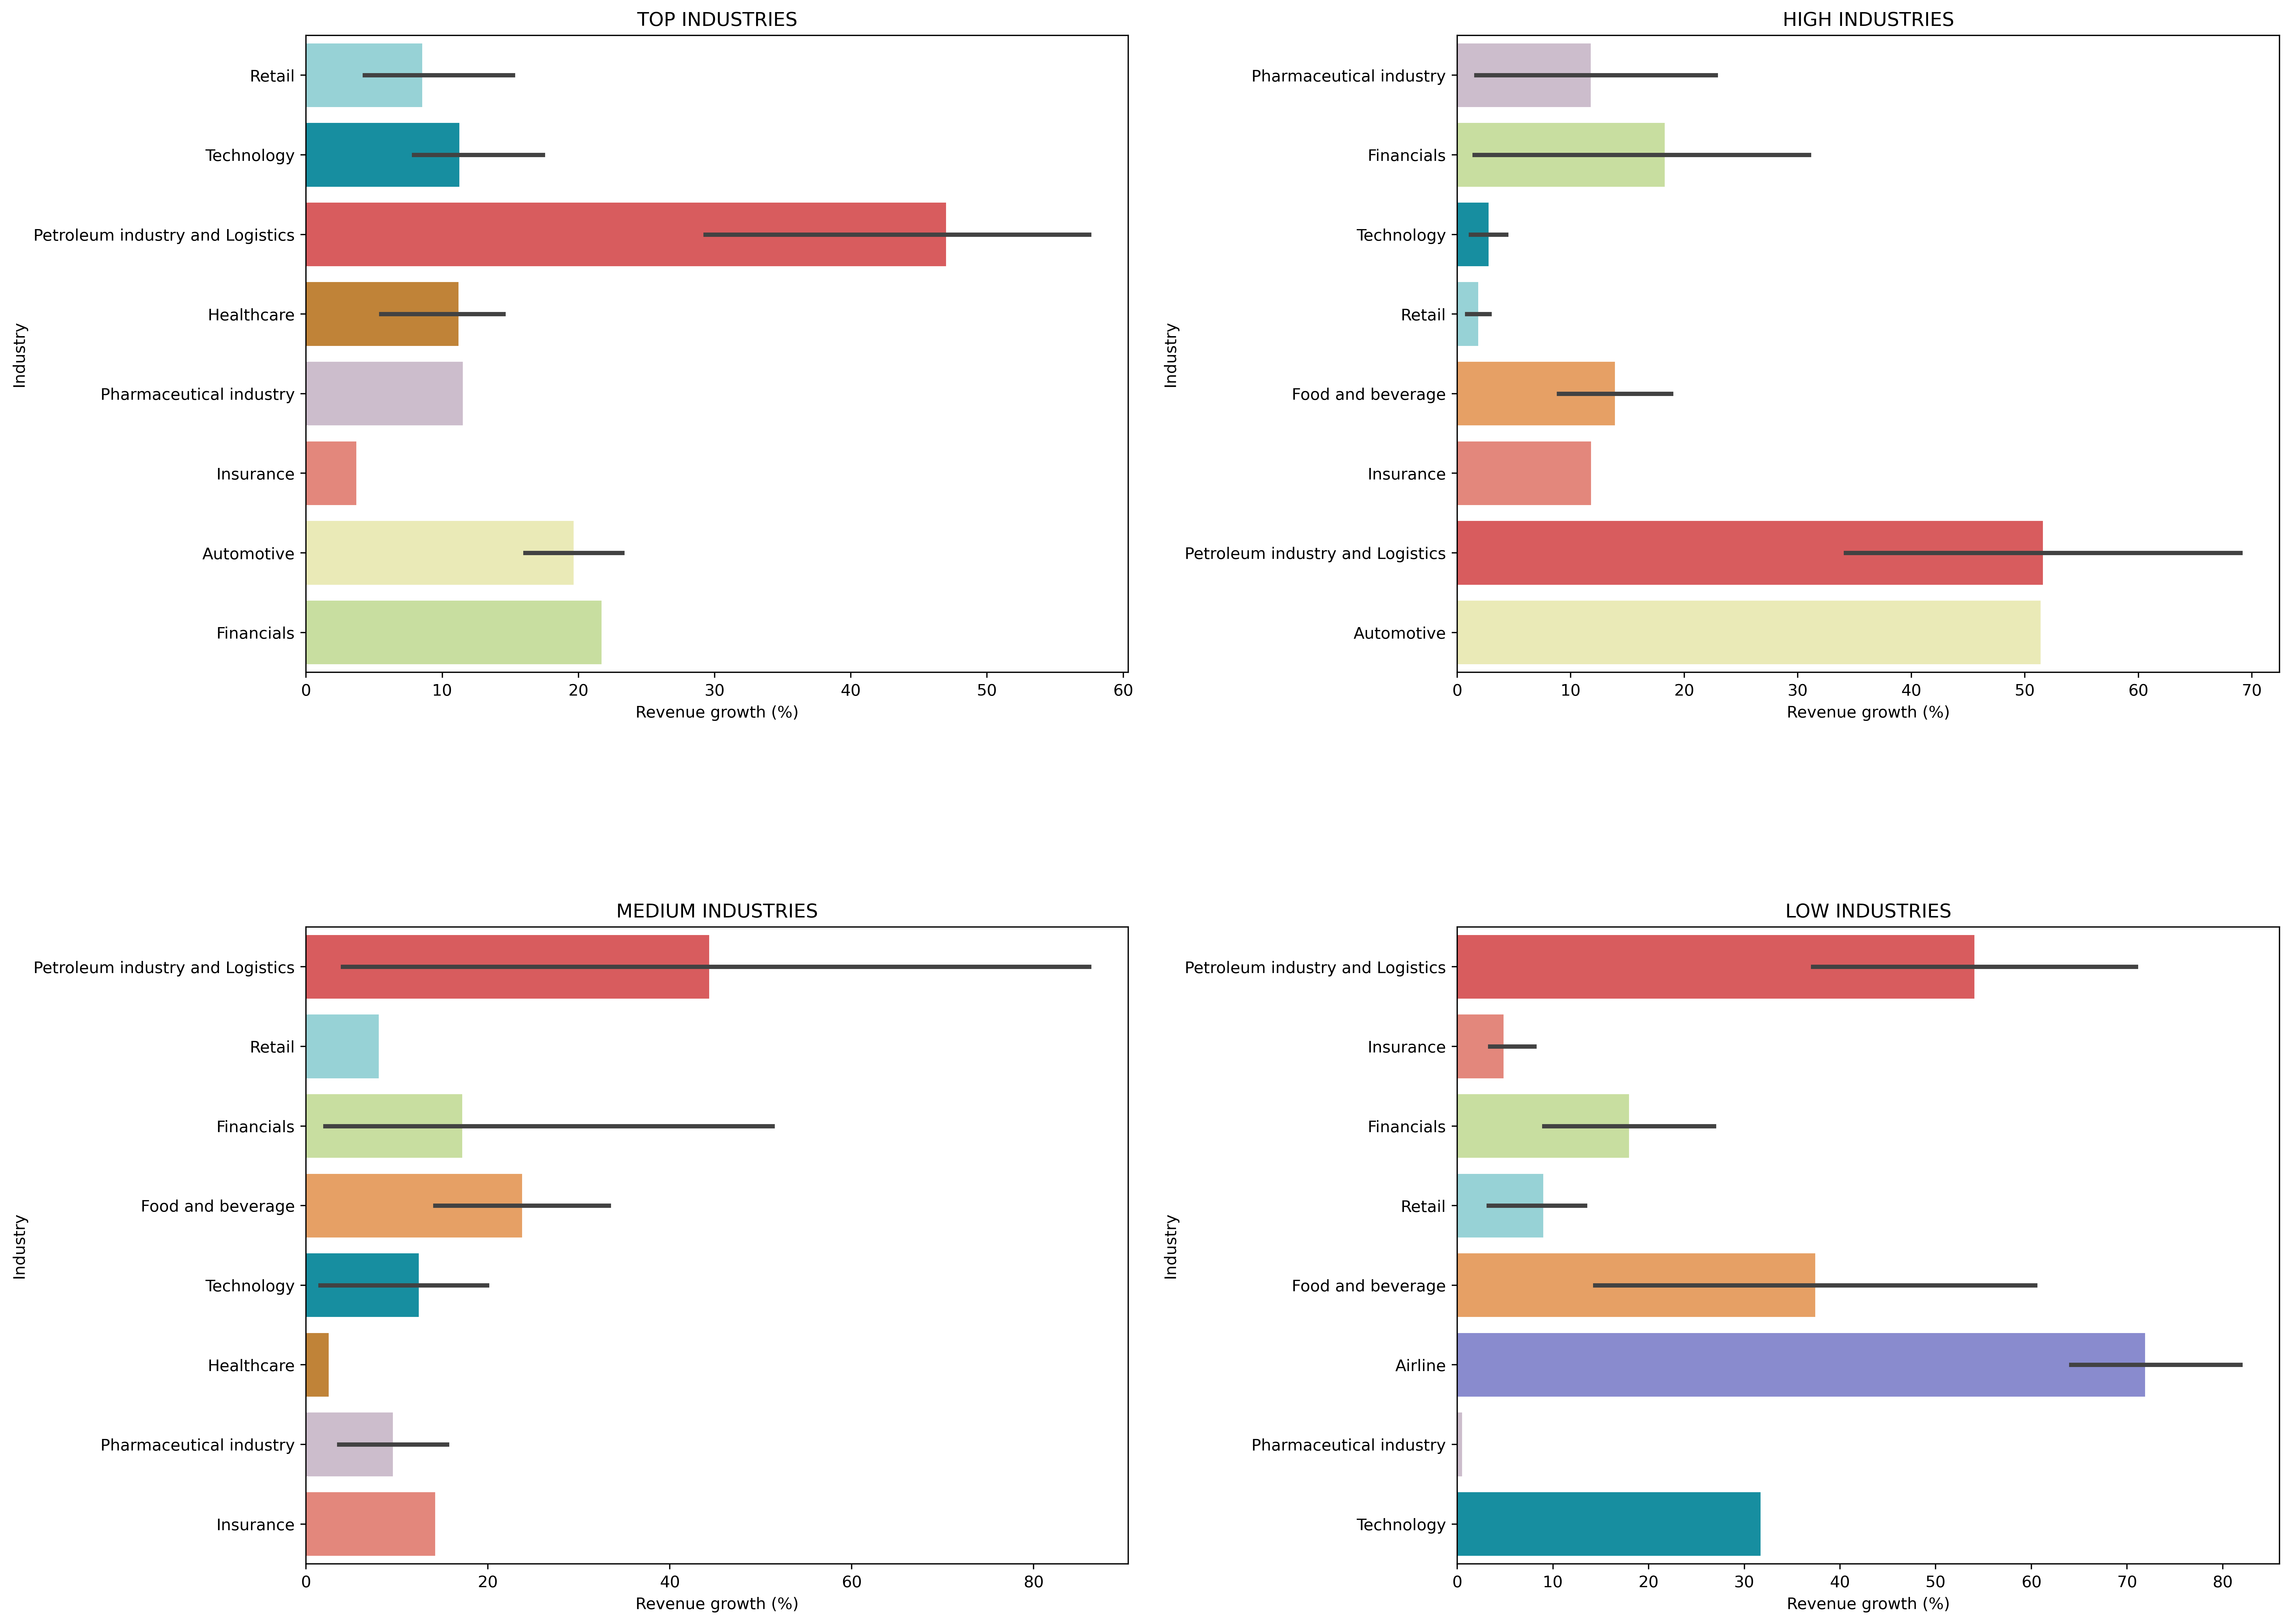

In [50]:
#Creo quattro subplots che mi permettono di poter vedere i tassi di crescita del fatturato per ciascuna società
#in fascia "Top", "High", "Medium" e "Low"

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,14),dpi=400)

sns.barplot(data=df_top,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi", palette=colors, ax=ax[0,0])

sns.barplot(data=df_high,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi", palette=colors, ax=ax[0,1])

sns.barplot(data=df_medium,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi", palette=colors, ax=ax[1,0])

sns.barplot(data=df_low,y="Industry", x="Revenue growth (%)", estimator=np.mean, errorbar="pi", palette=colors, ax=ax[1,1])

plt.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)
ax[0,0].set_title("TOP INDUSTRIES")
ax[0,1].set_title("HIGH INDUSTRIES")
ax[1,0].set_title("MEDIUM INDUSTRIES")
ax[1,1].set_title("LOW INDUSTRIES")
plt.show()